In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [38]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [41]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Null values in {column}: {null_count}")

Null values in id: 0
Null values in gender: 0
Null values in age: 0
Null values in hypertension: 0
Null values in heart_disease: 0
Null values in ever_married: 0
Null values in work_type: 0
Null values in Residence_type: 0
Null values in avg_glucose_level: 0
Null values in bmi: 201
Null values in smoking_status: 0
Null values in stroke: 0


In [42]:
for column in df.columns:
  print(column)
  print(df[column].unique())
  print(df[column].dtype,"\n")

id
[ 9046 51676 31112 ... 19723 37544 44679]
int64 

gender
['Male' 'Female' 'Other']
object 

age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-

In [43]:
other_gender_count = (df['gender'] == 'Other').sum()

print("Number of rows with gender 'Other':", other_gender_count)
other_smoker_count = (df['smoking_status'] == 'Unknown').sum()

print("Number of rows with smoking status 'Unknown':", other_smoker_count)


Number of rows with gender 'Other': 1
Number of rows with smoking status 'Unknown': 1544


In [44]:
df = df[df['gender'] != 'Other']

median_bmi = df['bmi'].median()
df['bmi'].fillna(median_bmi, inplace=True)
mode_smoking_status = df['smoking_status'].mode()[0]
df['smoking_status'].replace('Unknown', mode_smoking_status, inplace=True)

df.dropna(inplace=True)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [45]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print(df[i].dtype,"\n")

id
[ 9046 51676 31112 ... 19723 37544 44679]
int64 

gender
['Male' 'Female']
object 

age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e

In [46]:

for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Null values in {column}: {null_count}")


Null values in id: 0
Null values in gender: 0
Null values in age: 0
Null values in hypertension: 0
Null values in heart_disease: 0
Null values in ever_married: 0
Null values in work_type: 0
Null values in Residence_type: 0
Null values in avg_glucose_level: 0
Null values in bmi: 0
Null values in smoking_status: 0
Null values in stroke: 0


In [47]:
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Display the first few rows of the dataframe after encoding
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
33,54401,1,80.0,0,1,1,3,1,252.72,30.5,0,1
4149,57080,0,81.0,1,1,1,3,1,59.11,20.7,0,0
2833,50463,0,41.0,0,0,1,2,1,78.74,42.3,2,0
1627,53909,0,53.0,1,0,1,2,1,202.66,34.1,2,0
7,10434,0,69.0,0,0,0,2,1,94.39,22.8,1,1
2073,49615,0,12.0,0,0,0,4,1,58.14,21.3,1,0
975,23633,0,37.0,0,0,1,2,0,83.65,42.1,2,0
3200,61017,0,12.0,0,0,0,4,1,126.32,21.6,1,0
2543,67800,0,13.0,0,0,0,4,0,77.55,21.3,1,0
1918,33144,0,68.0,0,0,0,0,1,121.66,29.1,2,0


In [48]:

X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

numerical_cols = ['age', 'avg_glucose_level', 'bmi']


In [49]:
stroke_negative = (df['stroke'] == 0).sum()

print("Number of rows without stroke:", stroke_negative)

stroke_positive = (df['stroke'] == 1).sum()

print("Number of rows with stroke:", stroke_positive)

Number of rows without stroke: 4860
Number of rows with stroke: 249


In [50]:
smote = SMOTE(random_state=42, sampling_strategy = 'minority')
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [51]:
stroke_negative = (y_train == 0).sum()

print("Number of rows without stroke:", stroke_negative)

stroke_positive = (y_train == 1).sum()

print("Number of rows with stroke:", stroke_positive)

Number of rows without stroke: 3884
Number of rows with stroke: 3892


In [52]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3884, 3892], dtype=int64))

In [53]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols]) 
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [54]:
best_entropy = None
best_accuracy = 0
best_params = None

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

for criterion in param_grid['criterion']:
   
    model = RandomForestClassifier(random_state=42, criterion=criterion, n_jobs=-1)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', cv=5)

    grid_search.fit(X_train, y_train)
    
    if grid_search.best_score_ > best_accuracy:
        best_accuracy = grid_search.best_score_
        best_entropy = criterion
        best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

final_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], criterion=best_params['criterion'], class_weight=best_params['class_weight'], random_state=42)
final_model.fit(X_train, y_train)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(class_weight='balanced', max_depth=20, random_state=42)

Confusion Matrix:
 [[906  70]
 [ 33 935]]
Accuracy: 0.9470
Precision: 0.9303
Recall: 0.9659
F1 Score: 0.9478
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       976
           1       0.93      0.97      0.95       968

    accuracy                           0.95      1944
   macro avg       0.95      0.95      0.95      1944
weighted avg       0.95      0.95      0.95      1944



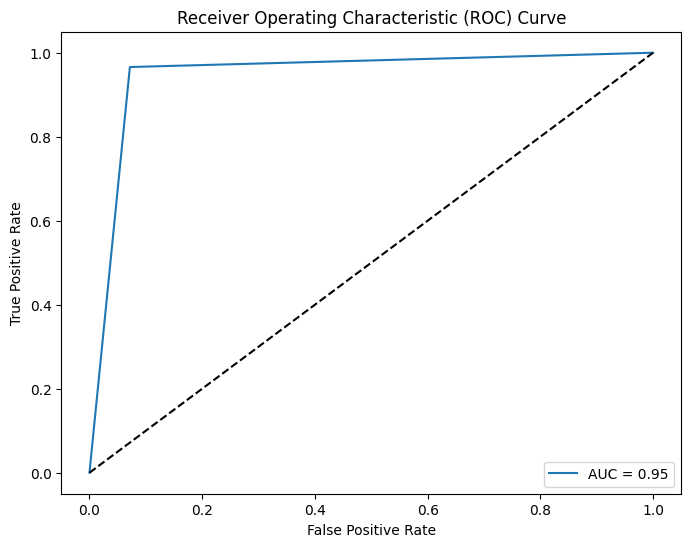

AUC: 0.9471


In [55]:
y_pred = final_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")


In [56]:
# Sample input data for testing predictions
new_data = {
    'gender': 1,
    'age': 55,
    'hypertension': 1,
    'heart_disease': 0,
    'ever_married': 1,
    'work_type': 2,
    'Residence_type': 2,
    'avg_glucose_level': 85.5,
    'bmi': 28.0,
    'smoking_status': 1
}

new_df = pd.DataFrame([new_data])

prediction = final_model.predict(new_df)

# Print the prediction
print("Prediction:", prediction[0])


Prediction: 0


In [57]:

data_to_predict = {
    'gender': 'Male',
    'age': 55,
    'hypertension': 1,
    'heart_disease': 0,
    'ever_married': 'Yes',
    'work_type': 'Private',
    'Residence_type': 'Urban',
    'avg_glucose_level': 85.5,
    'bmi': 28.0,
    'smoking_status': 'formerly smoked'
}

data_to_predict_df = pd.DataFrame([data_to_predict])
gender_mapping = {'Male': 1, 'Female': 0}
ever_married_mapping = {'Yes': 1, 'No': 0}
work_type_mapping = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
residence_type_mapping = {'Urban': 1, 'Rural': 0}
smoking_status_mapping = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}

data_to_predict_df['gender'] = data_to_predict_df['gender'].map(gender_mapping)
data_to_predict_df['ever_married'] = data_to_predict_df['ever_married'].map(ever_married_mapping)
data_to_predict_df['work_type'] = data_to_predict_df['work_type'].map(work_type_mapping)
data_to_predict_df['Residence_type'] = data_to_predict_df['Residence_type'].map(residence_type_mapping)
data_to_predict_df['smoking_status'] = data_to_predict_df['smoking_status'].map(smoking_status_mapping)

prediction = final_model.predict(data_to_predict_df)

print("Prediction:", prediction[0])


Prediction: 0
